In [1]:
import pandas as pd

df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [3]:
df.isnull().sum()


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [4]:
features = df[[
    "Income",
    "MntWines",
    "MntMeatProducts",
    "MntFruits",
    "NumWebPurchases",
    "NumStorePurchases"
]]

features.head()


,Income,MntWines,MntMeatProducts,MntFruits,NumWebPurchases,NumStorePurchases
0,58138.0,635,546,88,8,4
1,46344.0,11,6,1,1,2
2,71613.0,426,127,49,8,10
3,26646.0,11,20,4,2,4
4,58293.0,173,118,43,5,6


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


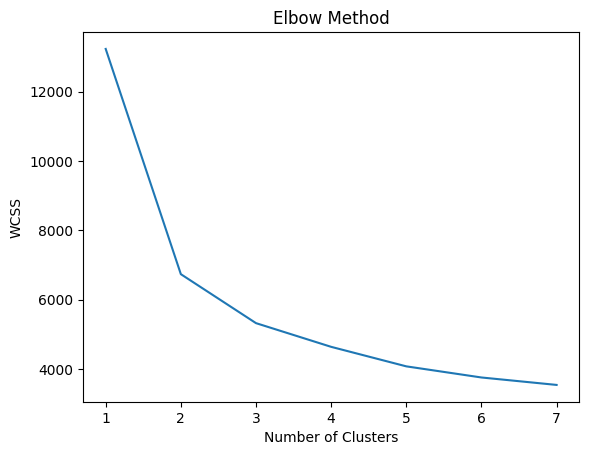

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

df["Cluster"].value_counts()


,count
Cluster,
1,1208
0,997


In [9]:
df.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Cluster'],
      dtype='object')

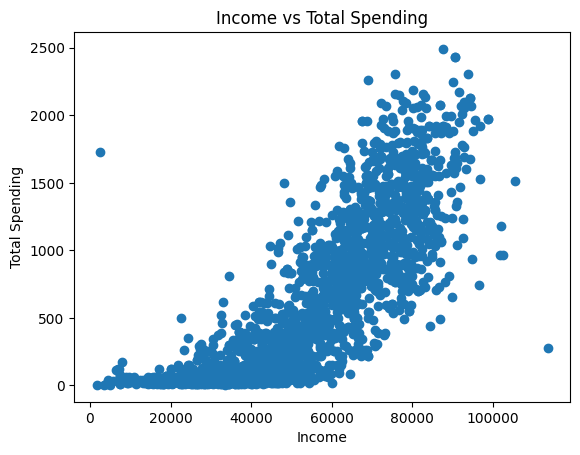

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['Income'], df['MntTotal'])
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.title('Income vs Total Spending')
plt.show()


In [11]:
X = df[['Income', 'MntTotal']]
X.head()


,Income,MntTotal
0,58138.0,1529
1,46344.0,21
2,71613.0,734
3,26646.0,48
4,58293.0,407


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[ 0.31465086,  1.67805628],
       [-0.25487741, -0.94087999],
       [ 0.96535404,  0.29738364],
       [-1.20608716, -0.89398922],
       [ 0.32213575, -0.27051567]])

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df[['Income', 'MntTotal', 'Cluster']].head()


,Income,MntTotal,Cluster
0,58138.0,1529,0
1,46344.0,21,1
2,71613.0,734,2
3,26646.0,48,1
4,58293.0,407,2


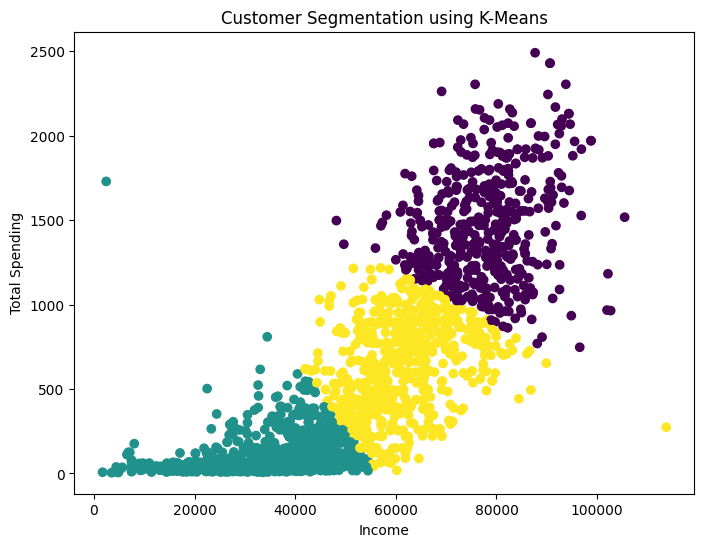

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['MntTotal'], c=df['Cluster'])
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.title('Customer Segmentation using K-Means')
plt.show()


Using K-Means clustering, customers were segmented into 3 distinct groups based on their Income and Total Spending. The clusters represent different customer behaviors such as low-income low-spending, medium-income medium-spending, and high-income high-spending customers. This segmentation helps businesses target customers more effectively with personalized marketing strategies.